### Treinando o Modelo
Treinando a máquina com os dados coletados

In [1]:
# Definição de variáveis

data_path = "../data/data.npy"
labels_path = "../data/labels.npy"

model_path = "../adivinha.pkl"


Total: 1279 imgs


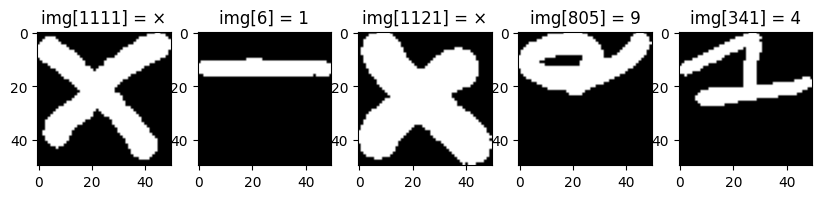

Transformando os dados em unidimensional...


In [2]:
# Carregando os dados

import numpy as np
import matplotlib.pyplot as plt

data = np.load(data_path)
labels = np.load(labels_path)

print(f"Total: {len(data)} imgs")

fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for ax in axes:
    random_img = np.random.randint(len(data))
    ax.imshow(data[random_img], cmap='gray')
    ax.set_title("img[{}] = {}".format(random_img, labels[random_img]))
plt.show()

# deixa as imagens em vetor unidimensional para treinar a máquina
print("Transformando os dados em unidimensional...")
data = np.reshape(data, (len(data), -1))


In [6]:
# Treinando a máquina para testar

from sklearn import svm
from sklearn.model_selection import train_test_split

print("Fazendo o split.")
train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size=0.1)

model = svm.SVC(class_weight='balanced')

print("Treinando a máquina.")
model.fit(train_X, train_y)

print("Acurácia:", model.score(test_X, test_y))

Fazendo o split.
Treinando a máquina.
Acurácia: 0.859375


In [8]:
# Salva o modelo novo

import pickle

with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)
